## Theory Overview: Stability of Neuronal Coupling via the Restricted Hessian

## Manifold Stability and the Symmetric‐Units Example

### 1. Manifold Stability (General Concept)

In a **gradient flow** system, parameters $\theta$ evolve over time according to 
$$
\frac{d\theta}{dt} \;=\; -\,\nabla f(\theta),
$$
where $f(\theta)$ is the loss function. A **manifold** $M\subset \mathbb{R}^n$ is said to be *invariant* under this flow if, whenever $\theta(0)$ lies on $M$, the trajectory $\theta(t)$ **remains** on $M$ for all $t>0$. In that case, the gradient $\nabla f(\theta)$ is always *tangent* to $M$ for any $\theta\in M$.  

An **additional** property we often want is *stability*: if we start *near* the manifold $M$, will the flow bring us *closer* to $M$? If so, we say the manifold is **locally stable** or **attracting**. Formally, if the parameters deviate slightly off $M$, a stable manifold implies the dynamics push them back toward $M$.

---

### 2. Example: Symmetric Units in an MLP

Consider a multi‐layer perceptron (MLP) with many neurons. Each neuron $i$ has:
- An *incoming weight vector* $W_i$, i.e. its row in the layer’s weight matrix (plus possibly a bias $b_i$).
- An *outgoing weight vector* in the **next** layer’s weight matrix (i.e. a column if you view that matrix from the next layer’s perspective).

Now suppose two neurons, $i$ and $j$, have **identical (or nearly identical)** incoming weights ($W_i \approx W_j$) and identical biases ($b_i \approx b_j$) as well as *identical outgoing weights*. Then the set of all parameters $\theta$ that enforce “$W_i = W_j$, $b_i = b_j$, and outgoing weights also equal” is a **manifold** in parameter space.  

1. **Invariance:**  
   - If your parameter $\theta$ lies exactly on this “symmetry manifold,” the gradient $\nabla f(\theta)$ typically satisfies $\nabla f(\theta)\big|_{W_i} = \nabla f(\theta)\big|_{W_j}$.  
   - This implies that under gradient descent, the updates for units $i$ and $j$ remain identical, so the parameters for those two neurons move *together*, keeping $W_i$ and $W_j$ (and $b_i$, $b_j$) equal at all times.  

2. **Stable Symmetry:**  
   - We further ask if small deviations off that manifold (i.e. $W_i \neq W_j$ by a small amount) get pulled **back** to it by the gradient flow.  
   - If so, we say the manifold of “coupled units” is **locally stable**: that means if at some point in training they are nearly identical, the gradient flow *reinforces* that similarity rather than letting them diverge.

Hence, for two symmetric neurons, the **subspace** of parameters satisfying $W_i = W_j$ and $b_i = b_j$ is an **invariant manifold**. Demonstrating **local stability** amounts to showing that, near that point, the gradient flow *reduces* the difference $W_i - W_j$, $b_i - b_j$.

---

### 3. Local Stability Criterion (Sketch)

A common way to test local stability is:
1. Identify the **manifold** $M$: in this case, $M = \{\theta : W_i = W_j,\ b_i = b_j,\ \dots\}$.  
2. Check the **gradient** is tangent at $M$: ensures *invariance*.  
3. Study the **Hessian** $\nabla^2 f(\theta_0)$ at a point $\theta_0 \in M$. In particular, look at directions **normal** to $M$—i.e., directions that *break* the symmetry (differences $W_i - W_j$).  
   - If the Hessian is *positively curved* in those normal directions (for gradient *descent*), small deviations get pushed back to $M$.  
   - Concretely, that means the restricted Hessian on the difference directions is **positive definite**, which implies a restoring force toward the manifold.

---

### 4. Conclusion

- **Manifold Stability:** A manifold $M$ of parameters is stable under gradient descent if starting near $M$ keeps you (or pushes you) closer to $M$.  
- **Symmetric Neurons:** Having two neurons with identical weights/biases is a special case of such a manifold. If the gradient flow is tangent to that manifold (no immediate push off it) *and* any small deviations are corrected (positive curvature in the difference directions), then *neuron coupling* is stable in the local neighborhood.  

This concept underscores why, in practice, if two neurons become nearly identical, they may remain so (or become even more similar) throughout training—reflecting a **stable** symmetry in the parameter space.

In a multi-layer neural network (MLP), each “unit” (or neuron) has associated trainable parameters—most notably the incoming weights and the bias for that neuron. When we **couple** two neurons, we deliberately constrain or make their parameters very similar so that they effectively share “behavior.” 

### 1. Manifold of Coupled Neurons

If we denote two neurons in the same layer by indices $i$ and $j$, then coupling them amounts to imposing a relationship such as
$$
    W_i \;\approx\; W_j, 
    \quad
    b_i \;\approx\; b_j,
$$
where $W_i, W_j$ are the *rows* (or *columns*, depending on context) in the weight matrix corresponding to neurons $i$ and $j$, and $b_i, b_j$ are their biases.

In a strict sense, **perfect** coupling would set $W_i = W_j$ and $b_i = b_j$.  Geometrically, this means the parameters lie on a *subspace* (or *manifold*) defined by those equality constraints.

### 2. Gradient Flow and Stability

We typically train neural networks via **gradient descent** on a loss function $f(\theta)$, where $\theta$ collects all network parameters.  For local stability analysis, we consider a trajectory $\dot{\theta}(t) = -\,\nabla f(\theta(t))$.  

- If we start exactly on the “coupled manifold,” meaning $W_i = W_j$ and $b_i = b_j$, and the flow **keeps** us there (i.e., no forces pulling us off), that subspace is *invariant*.  
- More importantly, we want to see if *small deviations* off this manifold get pulled back (stable) or pushed away (unstable).

### 3. Hessian Restriction and Normal Directions

To test local stability near a point $\theta_0$ on the coupled manifold, we look at the **Hessian** $\nabla^2 f(\theta_0)$.  The directions “normal” to the manifold are those that *break* the coupling constraints—for instance, a small difference $\delta = (W_i - W_j)$.

1. **Invariance Condition:**  
   If $\theta_0$ lies on the coupled manifold, for the manifold to be invariant under gradient descent, the gradient $\nabla f(\theta_0)$ must *respect* the coupling constraints (i.e., no immediate push off the manifold).

2. **Stability Condition (Positive Curvature):**  
   In gradient descent, small deviations in a normal direction $\delta$ are pushed back to the manifold if the Hessian $\nabla^2 f(\theta_0)$ is **positive** in that direction.  Formally, we want
   $$
     \delta^\top \,\nabla^2 f(\theta_0)\,\delta \;>\; 0
   $$
   for any $\delta$ that lies in the normal space.  Concretely, if $\delta$ is the difference of parameters between neurons $i$ and $j$, then the 2×2 (or small block) of the Hessian capturing partial derivatives w.r.t. these neurons’ parameters should be **positive definite**.

### 4. The Experiment

1. **Coupling Operation:**  
   - We select neurons $i$ and $j$ in layer $\ell$ and make their parameters similar by copying $W_i \approx W_j$ and $b_i \approx b_j$.  
   - We optionally add a small random perturbation so they are not *exactly* identical.

2. **Hessian Computation:**  
   - We compute the Hessian of the loss function w.r.t. the relevant parameters (in practice, w.r.t. the entire layer or just the biases).  
   - We extract the submatrix of that Hessian that corresponds specifically to $W_i, W_j$ (or $b_i, b_j$), which can be visualized as a 2×2 block if we look at just the pair $\{i, j\}$.  

3. **Testing Positive Definiteness:**  
   - If the 2×2 Hessian block 
     $$
       \begin{pmatrix}
         H_{ii} & H_{ij}\\
         H_{ij} & H_{jj}
       \end{pmatrix}
     $$
     is **positive definite**, it means any infinitesimal difference between neurons $i$ and $j$ leads to an *increase* in loss—and thus gradient descent tends to “push” the parameters back together.  Mathematically, that requires $H_{ii}>0$ and $\det>0$.  
   - In simpler terms, the difference direction $\delta = W_i - W_j$ (or $b_i - b_j$) is a direction of *positive* curvature.  

### 5. Conclusion

By examining the **restricted Hessian** in these “difference directions,” we can test **whether coupling two neurons is locally stable** under gradient descent. Positive curvature in that sub-block indicates that if they begin coupled (equal parameters) and deviate slightly, the training dynamics will bring them back together. If the curvature is negative or indefinite, then small deviations grow larger, implying the coupling is *unstable*.

In summary:

- **Coupled Manifold:** Parameters satisfying $W_i = W_j, b_i = b_j$.  
- **Local Stability Check:** Restrict the Hessian to the subspace normal to the manifold (the difference directions).  
- **Positive Definiteness:** Ensures stable coupling; negative or indefinite curvature indicates potential instability.

This theoretical framework underlies the experiment: **we couple two neurons, measure the Hessian’s curvature in the difference directions, and then draw conclusions about the stability of that coupling under gradient descent.**

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
import pandas as pd
import gc
import torch.nn.functional as F
from torch.autograd.functional import hessian


# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class ConfigurableMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_sizes, activation_type='relu'):
        super(ConfigurableMLP, self).__init__()
        
        # Set activation function based on input parameter
        if activation_type == 'relu':
            self.activation = nn.ReLU()
        elif activation_type == 'tanh':
            self.activation = nn.Tanh()
        elif activation_type == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation type: {activation_type}")
        
        # Create layers list starting with flattening the input
        self.flatten = nn.Flatten()
        
        # Build layer architecture
        layer_sizes = [input_dim] + hidden_sizes + [output_dim]
        self.layers = nn.ModuleList()
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            
    def forward(self, x):
        x = self.flatten(x)
        
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Apply activation to all but the last layer
            if i < len(self.layers) - 1:
                x = self.activation(x)
                
        return x
    
    def get_layer_weights(self, layer_idx):
        """Return the weight matrix of a specific layer"""
        return self.layers[layer_idx].weight
        
    def couple_units(self, layer_idx, unit_i, unit_j, epsilon=0.01):
        """
        Couple units i and j in layer layer_idx by making their incoming 
        and outgoing weights similar with a small perturbation.
        """
        # Handle incoming weights (weights of the specified layer)
        if layer_idx < len(self.layers):
            # Get the weights of the specified layer (but don't modify directly)
            weights = self.get_layer_weights(layer_idx).clone()
            
            # Make unit_j similar to unit_i with small perturbation
            # We keep unit_i as is and set unit_j to be similar
            noise = torch.randn_like(weights[unit_i]) * epsilon * torch.norm(weights[unit_i])
            
            # Create new weights tensor with the modified values
            new_weights = weights.clone()
            new_weights[unit_j] = weights[unit_i] + noise
            
            # Update the layer weights with the new tensor
            self.layers[layer_idx].weight.data = new_weights
            
            # Debug: verify the coupling
            cosine_sim = self.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
            print(f"DEBUG - After coupling incoming weights: cosine similarity = {cosine_sim:.4f}")
        
        # Handle outgoing weights (weights of the next layer)
        if layer_idx + 1 < len(self.layers):
            # Get the weights of the next layer (but don't modify directly)
            next_weights = self.get_layer_weights(layer_idx + 1).clone()
            
            # For outgoing weights, we need to process the columns
            # Extract the columns corresponding to unit_i and unit_j
            outgoing_i = next_weights[:, unit_i].clone()
            
            # Create perturbation for outgoing weights
            out_noise = torch.randn_like(outgoing_i) * epsilon * torch.norm(outgoing_i)
            
            # Set unit_j's outgoing weights based on unit_i with noise
            next_weights[:, unit_j] = outgoing_i + out_noise
            
            # Update the next layer weights
            self.layers[layer_idx + 1].weight.data = next_weights
            
            # Show the outgoing similarity
            cos_sim_out = torch.dot(next_weights[:, unit_i], next_weights[:, unit_j]) / (
                torch.norm(next_weights[:, unit_i]) * torch.norm(next_weights[:, unit_j]))
            print(f"DEBUG - After coupling outgoing weights: cosine similarity = {cos_sim_out.item():.4f}")
    
    def measure_unit_similarity(self, layer_idx, unit_i, unit_j, metric='cosine'):
        """
        Measure the similarity between units i and j in layer layer_idx.
        """
        weights = self.get_layer_weights(layer_idx)
        
        if metric == 'cosine':
            # Compute cosine similarity between incoming weight vectors
            norm_i = torch.norm(weights[unit_i])
            norm_j = torch.norm(weights[unit_j])
            
            if norm_i > 0 and norm_j > 0:
                cos_sim = torch.dot(weights[unit_i], weights[unit_j]) / (norm_i * norm_j)
                return cos_sim.item()
            else:
                return 0.0
        elif metric == 'euclidean':
            # Compute Euclidean distance between incoming weight vectors
            distance = torch.norm(weights[unit_i] - weights[unit_j])
            return distance.item()
        else:
            raise ValueError(f"Unsupported similarity metric: {metric}")


def compute_layer_hessian(model, inputs, targets, loss_fn, layer_idx):
    # Move inputs and targets to device
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    # Check if layer_idx is valid
    if layer_idx < 0 or layer_idx >= len(model.layers):
        raise ValueError(f"Invalid layer index: {layer_idx}. Model has {len(model.layers)} layers.")
    
    # Create a pure function to compute loss with respect to the layer parameters
    def layer_params_to_loss(flat_params):
        """
        Function that takes flattened parameters for the specified layer and returns the loss.
        """
        # Get the dimensions of the layer's parameters
        layer = model.layers[layer_idx]
        weight_size = layer.weight.numel()
        
        # Reshape parameters into weight and bias
        weight = flat_params[:weight_size].reshape(layer.weight.shape)
        bias = flat_params[weight_size:]
        
        # Make a forward pass through the model with our custom parameters
        x = model.flatten(inputs)
        
        # Pass through layers before our target layer using original parameters
        for i in range(layer_idx):
            x = model.layers[i](x)
            if i < len(model.layers) - 1:  # Apply activation if not the last layer
                x = model.activation(x)
        
        # Pass through our target layer with custom parameters
        x = F.linear(x, weight, bias)
        if layer_idx < len(model.layers) - 1:  # Apply activation if not the last layer
            x = model.activation(x)
        
        # Pass through remaining layers using original parameters
        for i in range(layer_idx + 1, len(model.layers)):
            x = model.layers[i](x)
            if i < len(model.layers) - 1:  # Apply activation if not the last layer
                x = model.activation(x)
        
        # Compute loss
        loss = loss_fn(x, targets)
        return loss
    
    # Get and flatten the layer parameters
    layer = model.layers[layer_idx]
    layer_params = torch.cat([layer.weight.flatten(), layer.bias])
    layer_params = layer_params.detach().requires_grad_(True)
    
    # Compute Hessian - potentially memory intensive operation
    print(f"Computing Hessian for layer {layer_idx} - this may take a moment...")
    
    try:
        # Move to CPU for hessian computation to avoid GPU memory issues
        cpu_layer_params = layer_params.cpu()
        
        # Define a cpu version of the loss function
        def cpu_params_to_loss(cpu_params):
            # Move params to device, compute loss, then get result back to CPU
            device_params = cpu_params.to(device)
            loss_value = layer_params_to_loss(device_params)
            return loss_value.cpu()
        
        # Compute Hessian on CPU
        H = hessian(cpu_params_to_loss, cpu_layer_params)
        
        # Calculate dimensions for weight and bias parts
        weight_size = layer.weight.numel()
        bias_size = layer.bias.numel()
        
        # Extract subblocks of the Hessian
        H_ww = H[:weight_size, :weight_size]  # weight-weight block
        input_dim = layer.weight.shape[1]   # din
        output_dim = layer.weight.shape[0]  # dout
        H_ww_4d = H_ww.reshape(output_dim, input_dim, output_dim, input_dim)
        H_wb = H[:weight_size, weight_size:]  # weight-bias block
        H_bw = H[weight_size:, :weight_size]  # bias-weight block
        H_bb = H[weight_size:, weight_size:]  # bias-bias block
        
        # Compute eigenvalues and condition number
        # eigenvalues = torch.linalg.eigvalsh(H)
        
        # Create result dictionary
        hessian_dict = {
            # 'full': H,
            'H_ww': H_ww,
            'H_ww_4d': H_ww_4d,
            'H_wb': H_wb,
            'H_bw': H_bw,
            'H_bb': H_bb,
            # 'eigenvalues': eigenvalues,
            'layer_index': layer_idx,
            'bias_shape': layer.bias.shape,
            'weight_shape': layer.weight.shape,
        }
        
        return hessian_dict
    
    except RuntimeError as e:
        print(f"Error computing Hessian: {e}")
        print("Trying with a smaller batch or on CPU...")
        # Here you could implement a fallback method for computing the Hessian
        raise e
    finally:
        # Clean up to free memory
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

def extract_incoming_block(H_ww_4d, i, j):
    """
    H_ww_4d: 4D Hessian of shape [out_dim, in_dim, out_dim, in_dim].
    i,j: two neuron indices in [0, out_dim).
    Returns a (2*in_dim) x (2*in_dim) torch.Tensor sub-block
    that captures the Hessian w.r.t. rows i and j only.
    """
    out_dim, in_dim, _, _ = H_ww_4d.shape
    block = torch.zeros(2*in_dim, 2*in_dim, dtype=H_ww_4d.dtype, device=H_ww_4d.device)

    # top-left
    block[0:in_dim, 0:in_dim] = H_ww_4d[i, :, i, :]

    # top-right
    block[0:in_dim, in_dim:] = H_ww_4d[i, :, j, :]

    # bottom-left
    block[in_dim:, 0:in_dim] = H_ww_4d[j, :, i, :]

    # bottom-right
    block[in_dim:, in_dim:] = H_ww_4d[j, :, j, :]

    return block

def extract_outgoing_block(H_ww_4d, i, j):
    """
    H_ww_4d: 4D Hessian of shape [out_dim, in_dim, out_dim, in_dim].
    i,j: two neuron indices in [0, out_dim).
    Returns a (2*in_dim) x (2*in_dim) torch.Tensor sub-block
    that captures the Hessian w.r.t. rows i and j only.
    """
    out_dim, in_dim, _, _ = H_ww_4d.shape
    block = torch.zeros(2*in_dim, 2*in_dim, dtype=H_ww_4d.dtype, device=H_ww_4d.device)

    # top-left
    block[0:in_dim, 0:in_dim] = H_ww_4d[:, i, :, i,]

    # top-right
    block[0:in_dim, in_dim:] = H_ww_4d[:, i, :, j,]

    # bottom-left
    block[in_dim:, 0:in_dim] = H_ww_4d[:, j, :, i,]

    # bottom-right
    block[in_dim:, in_dim:] = H_ww_4d[:, j, :, j,]

    return block

def build_difference_matrix(in_dim, device=None, dtype=None):
    """
    Returns D of shape (2*in_dim, in_dim)
    where each column is e_{i,k} - e_{j,k}.
    Top half has +1 in row k,
    Bottom half has -1 in row k,
    zeros otherwise.
    """
    D = torch.zeros(2*in_dim, in_dim, device=device, dtype=dtype)
    for k in range(in_dim):
        D[k, k] = 1.0             # the "top half" (i's row)
        D[in_dim + k, k] = -1.0   # the "bottom half" (j's row)
    return D





def test_coupling_stability(i, j, layer_idx, model, inputs, targets, loss_fn):
    print(f"testing coupling of neurons {i} & {j} in layer {layer_idx}")
    
    # Move inputs and targets to device
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    bias = []
    win = []
    wout = []
    
    try:
        
        # check incoming weight coupling conditions 
        hessian_dict = compute_layer_hessian(model, inputs, targets, loss_fn, layer_idx=layer_idx)
        # H_ww = hessian_dict['H_ww_4d']
        H_in = extract_incoming_block(hessian_dict['H_ww_4d'], i, j, )
        in_dim = H_in.shape[0]//2
        D = build_difference_matrix(in_dim, device=H_in.device, dtype=H_in.dtype)
        H_in = D.T @ H_in @ D    # shape (in_dim, in_dim)

        win = torch.linalg.eigvalsh(H_in) 
        # for k in range(H_ww.shape[1]):
        #     b = [[H_ww[i,k,i,k], H_ww[j,k,i,k]],[H_ww[i,k,j,k], H_ww[j,k,j,k]]]
        #     win.append((b[0][0] + b[1][1]-b[0][1]-b[1][0]).item())
            
        # check outgoing weight coupling conditions 
        hessian_dict = compute_layer_hessian(model, inputs, targets, loss_fn, layer_idx=layer_idx+1)
        H_out = extract_outgoing_block(hessian_dict['H_ww_4d'], i, j, )
        out_dim = H_out.shape[0]//2
        D = build_difference_matrix(out_dim, device=H_out.device, dtype=H_out.dtype)
        H_out = D.T @ H_out @ D    # shape (in_dim, in_dim)
        wout =  torch.linalg.eigvalsh(H_out) 
        # H_ww = hessian_dict['H_ww_4d']
        # Hb = hessian_dict['H_bb']
        # b = [[Hb[i,i],Hb[i,j]],[Hb[j,i],Hb[j,j]]]
        # bias  = ((b[0][0] + b[1][1]-b[0][1]-b[1][0]).item() )
        # for k in range(H_ww.shape[0]):
        #     b = [[H_ww[k,i,k,i], H_ww[k,j,k,i]],[H_ww[k,i,k,j], H_ww[k,j,k,j]]]
        #     wout.append((b[0][0] + b[1][1]-b[0][1]-b[1][0]).item())

    finally:
        # Clean up to free memory
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            
    # win = sorted(win)
    # wout = sorted(wout)
    return 0, win, wout


def pretty_print_tensor(tensor, precision=3):
    # Convert tensor to numpy array - move to CPU first if it's on GPU
    if tensor.is_cuda:
        arr = tensor.detach().cpu().numpy()
    else:
        arr = tensor.detach().numpy()
    # Create a DataFrame for better visual formatting
    df = pd.DataFrame(arr)
    # Set a custom float formatter for the DataFrame
    pd.options.display.float_format = f"{{:.{precision}f}}".format
    print(df)

def print_model(model, layer_idx, precision=3):
    # Print only the coupled layers (layer_idx and layer_idx+1)
    for i, layer in enumerate(model.layers):
        if i == layer_idx or i == layer_idx + 1:
            print(f'Layer {i} Bias:')
            pretty_print_tensor(layer.bias.data, precision=precision)
            print(f'\nLayer {i} Weight:')
            pretty_print_tensor(layer.weight.data, precision=precision)
            print('\n' + '-'*40 + '\n')

def load_cifar10_continual(first_classes, second_classes, batch_size=128):
    """
    Load CIFAR-10 dataset split for continual learning.
    first_classes and second_classes should be lists of class indices.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    # Download and load the training dataset
    full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=transform)
    full_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)
    
    # Create subsets for first task (first set of classes)
    first_train_indices = [i for i, (_, label) in enumerate(full_trainset) if label in first_classes]
    first_test_indices = [i for i, (_, label) in enumerate(full_testset) if label in first_classes]
    
    first_trainset = Subset(full_trainset, first_train_indices)
    first_testset = Subset(full_testset, first_test_indices)
    
    # Create subsets for second task (second set of classes)
    second_train_indices = [i for i, (_, label) in enumerate(full_trainset) if label in second_classes]
    second_test_indices = [i for i, (_, label) in enumerate(full_testset) if label in second_classes]
    
    second_trainset = Subset(full_trainset, second_train_indices)
    second_testset = Subset(full_testset, second_test_indices)
    
    # Determine number of workers based on device
    # When using CUDA, we want to use multiple workers for the DataLoader
    # When using CPU, fewer workers might be better
    num_workers = 2 if device.type == 'cuda' else 0
    
    # Pin memory for faster data transfer to GPU
    pin_memory = device.type == 'cuda'
    
    # Create dataloaders
    first_trainloader = DataLoader(
        first_trainset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    first_testloader = DataLoader(
        first_testset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    second_trainloader = DataLoader(
        second_trainset, 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    second_testloader = DataLoader(
        second_testset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    print(f"First task: {len(first_trainset)} training samples, {len(first_testset)} test samples")
    print(f"Second task: {len(second_trainset)} training samples, {len(second_testset)} test samples")
    
    return (first_trainloader, first_testloader), (second_trainloader, second_testloader)


def train_continual_learning(model, data_loaders, coupling_info, 
                           epochs_first_task=10, epochs_second_task=10, 
                           learning_rate=0.001, print_model_step=10, train_steps=20, train2_steps=40):
    """
    Train the model with a continual learning approach:
    1. Train on first set of classes
    2. Apply coupling
    3. Train on second set of classes
    """
    # Unpack data loaders
    (first_trainloader, first_testloader), (second_trainloader, second_testloader) = data_loaders
    
    # Extract coupling parameters
    layer_idx = coupling_info['layer']
    unit_i = coupling_info['unit_i']
    unit_j = coupling_info['unit_j']
    epsilon = coupling_info['epsilon']
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Move model to device
    model = model.to(device)
    
    # Track metrics over time
    metrics = {
        'train_losses': [],
        'test_accuracies_first': [],
        'test_accuracies_second': [],
        'cosine_similarity': [],
        'euclidean_distance': [],
        'phase': []  # 'first' or 'second' to track which task we're on
    }
    
    # Initial unit similarity
    cos_sim = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
    eucl_dist = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'euclidean')
    
    metrics['cosine_similarity'].append(cos_sim)
    metrics['euclidean_distance'].append(eucl_dist)
    metrics['phase'].append('initial')
    
    print(f"Initial cosine similarity: {cos_sim:.4f}, Euclidean distance: {eucl_dist:.4f}")
    
    # Phase 1: Train on first task
    print("\n===== Phase 1: Training on first set of classes =====")
    step = 0 
    for epoch in range(epochs_first_task):
        # Training loop
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(first_trainloader):
            step += 1 
            
            # Move input data to device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if step % print_model_step == 0:
                bias, win, wout = test_coupling_stability(unit_i, unit_j, layer_idx, model, inputs, labels, criterion)
                cos_sim = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
                print('#'*20 + f'epoch {epoch}, step {step}, cos_sim = {cos_sim:.3f} ' )
                print(f"bias = {bias}\nwin = {win}\nwout = {wout}")
                
                # Free memory after computation
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

            if step >= train_steps:
                break
        if step >= train_steps:
            break
            
        epoch_loss = running_loss / len(first_trainloader)
        metrics['train_losses'].append(epoch_loss)
        metrics['phase'].append('first')
        
        # Evaluate on both tasks
        model.eval()
        acc_first = evaluate_model(model, first_testloader)
        acc_second = evaluate_model(model, second_testloader)
        
        metrics['test_accuracies_first'].append(acc_first)
        metrics['test_accuracies_second'].append(acc_second)
        
        # Measure unit similarity
        cos_sim = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
        eucl_dist = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'euclidean')
        
        metrics['cosine_similarity'].append(cos_sim)
        metrics['euclidean_distance'].append(eucl_dist)
        
        print(f"Task 1 Epoch {epoch+1}/{epochs_first_task} - Loss: {epoch_loss:.4f}")
        print(f"  Acc (Task 1): {acc_first:.2f}%, Acc (Task 2): {acc_second:.2f}%")
        print(f"  Unit similarity - Cosine: {cos_sim:.4f}, Euclidean: {eucl_dist:.4f}")
    
    print("\n===== Applying unit coupling =====")
    
    # Measure similarity before coupling
    cos_sim_before = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
    eucl_dist_before = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'euclidean')
    
    # Apply coupling
    model.couple_units(layer_idx, unit_i, unit_j, epsilon)
    
    # Measure similarity after coupling
    cos_sim_after = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
    eucl_dist_after = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'euclidean')

    
    print(f"Before coupling: cosine={cos_sim_before:.4f}, distance={eucl_dist_before:.4f}")
    print(f"After coupling: cosine={cos_sim_after:.4f}, distance={eucl_dist_after:.4f}")
    
    # Add coupling point to metrics
    metrics['cosine_similarity'].append(cos_sim_after)
    metrics['euclidean_distance'].append(eucl_dist_after)
    metrics['phase'].append('coupling')
    
    # Phase 2: Train on second task
    print("\n===== Phase 2: Training on second set of classes =====")
    step = 0 
    for epoch in range(epochs_second_task):
        # Training loop
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(second_trainloader):
            step += 1
            
            # Move input data to device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if step % print_model_step == 0:
                bias, win, wout = test_coupling_stability(unit_i, unit_j, layer_idx, model, inputs, labels, criterion)
                cos_sim = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
                print('#'*20 + f'epoch {epoch}, step {step}, cos_sim = {cos_sim:.3f} ' )
                print(f"bias = {bias}\nwin = {win}\nwout = {wout}")
                
                # Free memory after computation
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                
            if step >= train2_steps:
                break
        if step >= train2_steps:
            break
            
        epoch_loss = running_loss / len(second_trainloader)
        metrics['train_losses'].append(epoch_loss)
        metrics['phase'].append('second')
        
        # Evaluate on both tasks
        model.eval()
        acc_first = evaluate_model(model, first_testloader)
        acc_second = evaluate_model(model, second_testloader)
        
        metrics['test_accuracies_first'].append(acc_first)
        metrics['test_accuracies_second'].append(acc_second)
        
        # Measure unit similarity
        cos_sim = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
        eucl_dist = model.measure_unit_similarity(layer_idx, unit_i, unit_j, 'euclidean')

        metrics['cosine_similarity'].append(cos_sim)
        metrics['euclidean_distance'].append(eucl_dist)
        
        print(f"Task 2 Epoch {epoch+1}/{epochs_second_task} - Loss: {epoch_loss:.4f}")
        print(f"  Acc (Task 1): {acc_first:.2f}%, Acc (Task 2): {acc_second:.2f}%")
        print(f"  Unit similarity - Cosine: {cos_sim:.4f}, Euclidean: {eucl_dist:.4f}")
        
    # print_model(model, layer_idx)
    
    # Clean up to ensure all GPU memory is released
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()
    
    return metrics



def evaluate_model(model, dataloader):
    """Evaluate model accuracy on a dataset"""
    correct = 0
    total = 0
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            # Move data to the appropriate device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # Free memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    return 100 * correct / total if total > 0 else 0

def plot_continual_learning_results(metrics):
    """Plot the results of the continual learning experiment"""
    # Find phase transition indices
    phases = metrics['phase']
    first_phase_end = phases.index('coupling') - 1
    coupling_idx = phases.index('coupling')
    second_phase_start = coupling_idx + 1
    
    # Create figure with multiple subplots
    plt.figure(figsize=(12, 18))
    
    # Use CPU for matplotlib operations
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # Create figure with multiple subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    
    # Plot training loss
    axs[0].plot(metrics['train_losses'], 'b-')
    axs[0].set_title('Training Loss')
    axs[0].set_xlabel('Training Step')
    axs[0].set_ylabel('Loss')
    
    # Add vertical lines for phase transitions
    axs[0].axvline(x=first_phase_end, color='r', linestyle='--', label='End of Task 1')
    axs[0].axvline(x=coupling_idx, color='g', linestyle='--', label='Coupling Applied')
    axs[0].axvline(x=second_phase_start, color='m', linestyle='--', label='Start of Task 2')
    axs[0].legend()
    
    # Plot test accuracy
    axs[1].plot(metrics['test_accuracies_first'], 'b-', label='Task 1 (First Classes)')
    axs[1].plot(metrics['test_accuracies_second'], 'g-', label='Task 2 (Second Classes)')
    axs[1].set_title('Test Accuracy by Task')
    axs[1].set_xlabel('Training Step')
    axs[1].set_ylabel('Accuracy (%)')
    
    # Add vertical lines for phase transitions
    axs[1].axvline(x=first_phase_end, color='r', linestyle='--', label='End of Task 1')
    axs[1].axvline(x=coupling_idx, color='g', linestyle='--', label='Coupling Applied')
    axs[1].axvline(x=second_phase_start, color='m', linestyle='--', label='Start of Task 2')
    axs[1].legend()
    
    # Plot similarity metrics
    axs[2].plot(metrics['cosine_similarity'], 'b-', label='Cosine Similarity')
    axs[2].set_title('Unit Similarity Metrics')
    axs[2].set_xlabel('Training Step')
    axs[2].set_ylabel('Cosine Similarity')
    
    
    # Add vertical lines for phase transitions
    axs[2].axvline(x=first_phase_end, color='r', linestyle='--', label='End of Task 1')
    axs[2].axvline(x=coupling_idx, color='g', linestyle='--', label='Coupling Applied')
    axs[2].axvline(x=second_phase_start, color='m', linestyle='--', label='Start of Task 2')
    
    # Combine legends
    lines1, labels1 = axs[2].get_legend_handles_labels()
    axs[2].legend(lines1, labels1, loc='upper right')
    
    plt.tight_layout()
    plt.savefig('continual_learning_results.png')
    plt.show()
    
    # Clean up matplotlib memory
    plt.close('all')

def run_continual_learning_experiment(
    hidden_sizes=[7]*5, 
    activation_type='relu',
    first_classes=[0, 1, 2, 3, 4],  # First 5 CIFAR-10 classes
    second_classes=[5, 6, 7, 8, 9],  # Second 5 CIFAR-10 classes
    couple_layer=1,
    couple_units=(10, 20),
    epsilon=0.01,
    epochs_first_task=5,
    epochs_second_task=5,
    learning_rate=0.001,
    batch_size=128,
    print_model_step=10, 
    train_steps=20,
    train2_steps=40,
):
    """Run the complete continual learning experiment"""
    # Get class names for better reporting
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                 'dog', 'frog', 'horse', 'ship', 'truck']
    
    first_class_names = [class_names[i] for i in first_classes]
    second_class_names = [class_names[i] for i in second_classes]
    
    print(f"First task classes: {first_class_names}")
    print(f"Second task classes: {second_class_names}")
    
    try:
        # Load datasets for continual learning
        data_loaders = load_cifar10_continual(first_classes, second_classes, batch_size=batch_size)
        
        # Calculate input dimensions for CIFAR-10 (3 channels, 32x32 images)
        input_dim = 3 * 32 * 32
        output_dim = 10  # All CIFAR-10 classes
        
        # Create the model
        model = ConfigurableMLP(input_dim, output_dim, hidden_sizes, activation_type)
        print(f"Created MLP with architecture: {input_dim} -> {' -> '.join(map(str, hidden_sizes))} -> {output_dim}")
        print(f"Activation function: {activation_type}")
        
        # Move model to device
        model = model.to(device)
        
        # Coupling parameters
        coupling_info = {
            'layer': couple_layer,
            'unit_i': couple_units[0],
            'unit_j': couple_units[1],
            'epsilon': epsilon
        }
        
        print(f"Will couple units {couple_units[0]} and {couple_units[1]} in layer {couple_layer}, meaning we couple ")
        print(f"rows  {couple_units[0]} and {couple_units[1]} of weight matrix layer {couple_layer}")
        print(f"and columns {couple_units[0]} and {couple_units[1]} of weight matrix layer {couple_layer+1}")
        print(f" using {epsilon:.3f} perturbation")
        
        # Train with continual learning approach
        metrics = train_continual_learning(
            model, 
            data_loaders,
            coupling_info,
            epochs_first_task=epochs_first_task,
            epochs_second_task=epochs_second_task,
            learning_rate=learning_rate,
            print_model_step=print_model_step, 
            train_steps=train_steps,
            train2_steps=train2_steps,
        )
        
        # Plot and save results - do this on CPU to avoid memory issues
        # Move model to CPU for final analysis
        model = model.to('cpu')
        # plot_continual_learning_results(metrics)
        
        # Analyze results of correlation after coupling
        coupling_idx = metrics['phase'].index('coupling')
        post_coupling_cosine = metrics['cosine_similarity'][coupling_idx]
        final_cosine = metrics['cosine_similarity'][-1]
        
        post_coupling_distance = metrics['euclidean_distance'][coupling_idx]
        final_distance = metrics['euclidean_distance'][-1]
        
        print("\n===== Final Results =====")
        print(f"Cosine similarity: {post_coupling_cosine:.4f} (after coupling) -> {final_cosine:.4f} (final)")
        print(f"Euclidean distance: {post_coupling_distance:.4f} (after coupling) -> {final_distance:.4f} (final)")
        
        if final_cosine > post_coupling_cosine:
            print("Units became MORE similar in terms of cosine similarity during training on second task.")
        else:
            print("Units became LESS similar in terms of cosine similarity during training on second task.")
        
        if final_distance < post_coupling_distance:
            print("Units became CLOSER in terms of Euclidean distance during training on second task.")
        else:
            print("Units moved FURTHER APART in terms of Euclidean distance during training on second task.")
        
        # Also measure catastrophic forgetting
        first_task_acc_before = metrics['test_accuracies_first'][coupling_idx - 1]
        first_task_acc_after = metrics['test_accuracies_first'][-1]
        
        print("\n===== Catastrophic Forgetting Analysis =====")
        print(f"Task 1 accuracy: {first_task_acc_before:.2f}% (before Task 2) -> {first_task_acc_after:.2f}% (after Task 2)")
        
        forgetting = first_task_acc_before - first_task_acc_after
        if forgetting > 0:
            print(f"Catastrophic forgetting observed: {forgetting:.2f}% drop in Task 1 performance.")
        else:
            print(f"No forgetting observed. Task 1 performance improved by {-forgetting:.2f}%.")
        
        return model, metrics
    
    finally:
        # Make sure memory is cleaned up
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

if __name__ == "__main__":
    # Run the continual learning experiment
    config = dict(
        first_classes=[0, 1,8,9],  # First 5 CIFAR-10 classes (airplane, auto, bird, cat, deer)
        second_classes=[2, 5, 6, 7, 3,4],  # Second 5 CIFAR-10 classes (dog, frog, horse, ship, truck)
        hidden_sizes=[200,]*6, 
        activation_type='tanh',
        couple_layer=3,  # Second layer (0-indexed)
        couple_units=(0, 1),  # Couple units 0 and 1
        epsilon=0.01,  # Perturbation factor
        epochs_first_task=15,
        epochs_second_task=5,
        learning_rate=0.01,
        batch_size=512,
        print_model_step=100, 
        train_steps=10000,
        train2_steps=10000,
    )
    print('\n\n================= longer trainig =================\n\n') 
    for _ in range(3):
        print("\n\n\nexperimental config = ", config)
        model, metrics = run_continual_learning_experiment(**config)
    # config['train_steps'] = 10
    config['epochs_first_task'] = 1
    print('\n\n================= shorter trainig =================\n\n') 
    for _ in range(3):
        print("\n\n\nexperimental config = ", config)
        model, metrics = run_continual_learning_experiment(**config)

Using device: cuda


================= longer trainig =================





experimental config =  {'first_classes': [0, 1, 8, 9], 'second_classes': [2, 5, 6, 7, 3, 4], 'hidden_sizes': [200, 200, 200, 200, 200, 200], 'activation_type': 'tanh', 'couple_layer': 3, 'couple_units': (0, 1), 'epsilon': 0.01, 'epochs_first_task': 15, 'epochs_second_task': 5, 'learning_rate': 0.01, 'batch_size': 512, 'print_model_step': 100, 'train_steps': 10000, 'train2_steps': 10000}
First task classes: ['airplane', 'automobile', 'ship', 'truck']
Second task classes: ['bird', 'dog', 'frog', 'horse', 'cat', 'deer']
Files already downloaded and verified
Files already downloaded and verified
First task: 20000 training samples, 4000 test samples
Second task: 30000 training samples, 6000 test samples
Created MLP with architecture: 3072 -> 200 -> 200 -> 200 -> 200 -> 200 -> 200 -> 10
Activation function: tanh
Will couple units 0 and 1 in layer 3, meaning we couple 
rows  0 and 1 of weight matrix layer 3
and colum

In [45]:
import re

def extract_coupling_events(log_text):
    # Split the log into sections by training type ("longer trainig" and "shorter trainig")
    # (Note: the logs contain the spelling "trainig" so we use that string.)
    sections = re.split(r'={5,}\s*(longer|shorter)\s+trainig\s*={5,}', log_text, flags=re.IGNORECASE)
    # The split list will contain header parts and captured training type strings.
    results = []
    # Iterate over the sections. Every odd index is a training type, followed by the corresponding section text.
    for i in range(1, len(sections), 2):
        training_type = sections[i].strip().lower()  # "longer" or "shorter"
        section_text = sections[i+1]
        # Each experiment run starts with the line "experimental config ="
        runs = re.split(r'(experimental config =)', section_text)
        run_texts = []
        # Reconstruct each run (by joining the marker with the following text)
        for j in range(1, len(runs), 2):
            run_text = runs[j] + runs[j+1]
            run_texts.append(run_text)
        
        # For seed numbering, assume the order in the section gives seed 1,2,3,...
        for seed_index, run in enumerate(run_texts, start=1):
            # Define a regex to capture each coupling event block
            # It finds the block that starts with "####################epoch" then win and wout lines.
            event_pattern = re.compile(
                r'#{5,}\s*epoch\s+(\d+),\s*step\s+(\d+),\s*cos_sim\s*=\s*([-\d\.Ee]+).*?'
                r'win\s*=\s*tensor\((.*?)\).*?'
                r'wout\s*=\s*tensor\((.*?)\)',
                flags=re.DOTALL | re.IGNORECASE
            )
            # Determine the location of the coupling marker for phase change.
            coupling_marker = "===== Applying unit coupling ====="
            coupling_index = run.find(coupling_marker)
            
            for match in event_pattern.finditer(run):
                epoch = int(match.group(1))
                step  = int(match.group(2))
                cos_sim = match.group(3).strip()
                win_str = match.group(4).strip()
                wout_str = match.group(5).strip()
                
                # Determine phase: if the coupling event occurs AFTER the marker, it's phase 2.
                if coupling_index != -1 and match.start() > coupling_index:
                    phase = "Phase 2"
                else:
                    phase = "Phase 1"
                
                # Save the extracted event information.
                results.append({
                    "training_type": training_type,  # "longer" or "shorter"
                    "seed": seed_index,
                    "phase": phase,
                    "epoch": epoch,
                    "step": step,
                    "cos_sim": cos_sim,
                    "win": eval(win_str),
                    "wout": eval(wout_str)
                })
    return results

# Example usage:
if __name__ == '__main__':
    # Read your log text from a file (or define it as a multiline string)
    with open("log.txt", "r") as f:
        log_text = f.read()
    
    events = extract_coupling_events(log_text)
    
    # Print out the extracted events:
    for ev in events:
        print(f"Training: {ev['training_type']}, Seed: {ev['seed']}, {ev['phase']}, Epoch: {ev['epoch']}, Step: {ev['step']}")
        print(f"    cos_sim = {ev['cos_sim']}")
        print(f"    win = {ev['win']}")
        print(f"    wout = {ev['wout']}")
        print("-"*80)


Training: longer, Seed: 1, Phase 1, Epoch: 2, Step: 100
    cos_sim = 0.226
    win = [-0.010057, -0.0051312, -0.0021936, -0.001356, -0.00085231, -0.00062902, -0.00038814, -0.00030525, -0.0002361, -0.0001716, -0.00013853, -0.00011702, -8.7452e-05, -6.8232e-05, -6.2275e-05, -5.4817e-05, -4.9105e-05, -4.4498e-05, -4.0845e-05, -3.488e-05, -3.1727e-05, -2.9022e-05, -2.7472e-05, -2.4894e-05, -2.3911e-05, -2.3127e-05, -1.9648e-05, -1.9302e-05, -1.6461e-05, -1.5482e-05, -1.3889e-05, -1.3249e-05, -1.1376e-05, -1.0827e-05, -1.0226e-05, -9.613e-06, -9.1119e-06, -7.9667e-06, -7.788e-06, -6.7689e-06, -6.1904e-06, -5.7642e-06, -5.3821e-06, -5.103e-06, -4.6747e-06, -4.5487e-06, -4.0443e-06, -3.9421e-06, -3.6772e-06, -3.3436e-06, -2.9826e-06, -2.56e-06, -2.4867e-06, -2.2529e-06, -2.2487e-06, -2.1313e-06, -1.9475e-06, -1.8693e-06, -1.7487e-06, -1.6174e-06, -1.5541e-06, -1.3737e-06, -1.3085e-06, -1.2977e-06, -1.1998e-06, -1.0187e-06, -9.8918e-07, -8.8717e-07, -7.9938e-07, -7.7126e-07, -6.795e-07, -6.09

In [21]:
b = False
for w in s.split('\n'):
    if 'longer trainig' in w or 'shorter trainig' in w:
        print(w)
    if b:
        print(w)
        b = False
    if 'Final Results' in w:
        b = True

================= longer trainig =================
Cosine similarity: 0.9910 (after coupling) -> 0.5049 (final)
Cosine similarity: 0.9916 (after coupling) -> 0.8850 (final)
Cosine similarity: 0.9905 (after coupling) -> 0.8488 (final)
================= shorter trainig =================
Cosine similarity: 0.9901 (after coupling) -> 0.6765 (final)
Cosine similarity: 0.9898 (after coupling) -> 0.4225 (final)
Cosine similarity: 0.9886 (after coupling) -> 0.7354 (final)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   1.,   2., 180.,   9.,   2.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.00570000e-02, -9.46087667e-03, -8.86475333e-03, -8.26863000e-03,
        -7.67250667e-03, -7.07638333e-03, -6.48026000e-03, -5.88413667e-03,
        -5.28801333e-03, -4.69189000e-03, -4.09576667e-03, -3.49964333e-03,
        -2.90352000e-03, -2.30739667e-03, -1.71127333e-03, -1.11515000e-03,
        -5.19026667e-04,  7.70966667e-05,  6.73220000e-04,  1.26934333e-03,
         1.86546667e-03,  2.46159000e-03,  3.05771333e-03,  3.65383667e-03,
         4.24996000e-03,  4.84608333e-03,  5.44220667e-03,  6.03833000e-03,
         6.63445333e-03,  7.23057667e-03,  7.82670000e-03]),
 <BarContainer object of 30 artists>)

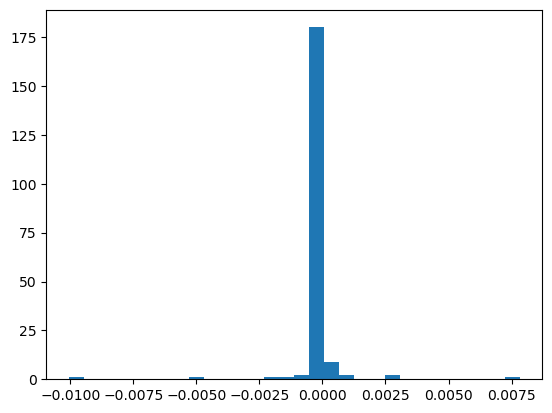

In [29]:
import matplotlib.pyplot as plt 
plt.hist(events[0]['win'],30)

win 1 shorter, 0.377 min win = -0.00015570549999999997, max win = 0.00010378549999999973
win 2 shorter, 0.708 min win = -0.00025026199999999996, max win = 0.00022796999999999924
win 3 shorter, 0.873 min win = -0.00018683699999999995, max win = 0.00014331949999999932
win 2 longer, 0.908 min win = -0.00020543599999999995, max win = 0.0003677499999999991
win 3 longer, 0.913 min win = -0.0005441534999999999, max win = 0.0005306754999999995
win 2 longer, 0.932 min win = -0.0002520334999999998, max win = 0.0004522294999999983


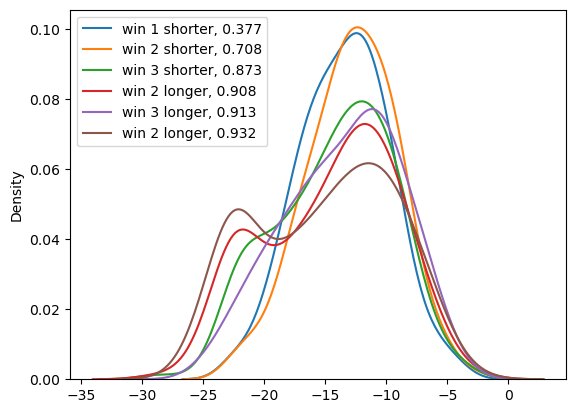

In [112]:
import seaborn as sns 
events2 = [e for e in events if e['phase']=='Phase 2']
events2 = sorted([(e['cos_sim'],e) for e in events2])
_, events2 = zip(*events2)

seed = -1 
for e in events2:
    win = np.array(e['win'])
    wout = np.array(e['wout'])
    # win = win[win<0]
    # wout = wout[wout<0]
    
    
    if seed != e['seed']:
        print(f"win {e['seed']} {e['training_type']}, {e['cos_sim']} min win = {np.quantile(win,.05)}, max win = {np.quantile(win,0.95):}")
        wout = np.log(np.abs(wout))
        win =  np.log(np.abs(win))
        sns.kdeplot(win, label=f"win {e['seed']} {e['training_type']}, {e['cos_sim']}",)
        # sns.kdeplot(wout, label=f"wout {e['seed']} {e['training_type']}, {e['cos_sim']}",)
        # sns.kdeplot(np.log(-win[win<0]), label=f"win {e['seed']} {e['training_type']}, {e['cos_sim']}",)
        # sns.kdeplot(np.log(-wout[wout<0]), label=f"wout {e['seed']} {e['training_type']}, {e['cos_sim']}",)
        seed = e['seed']
plt.legend()


In [86]:
np.max(np.log(np.abs(wout)))

-6.509046275370981